In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timedelta


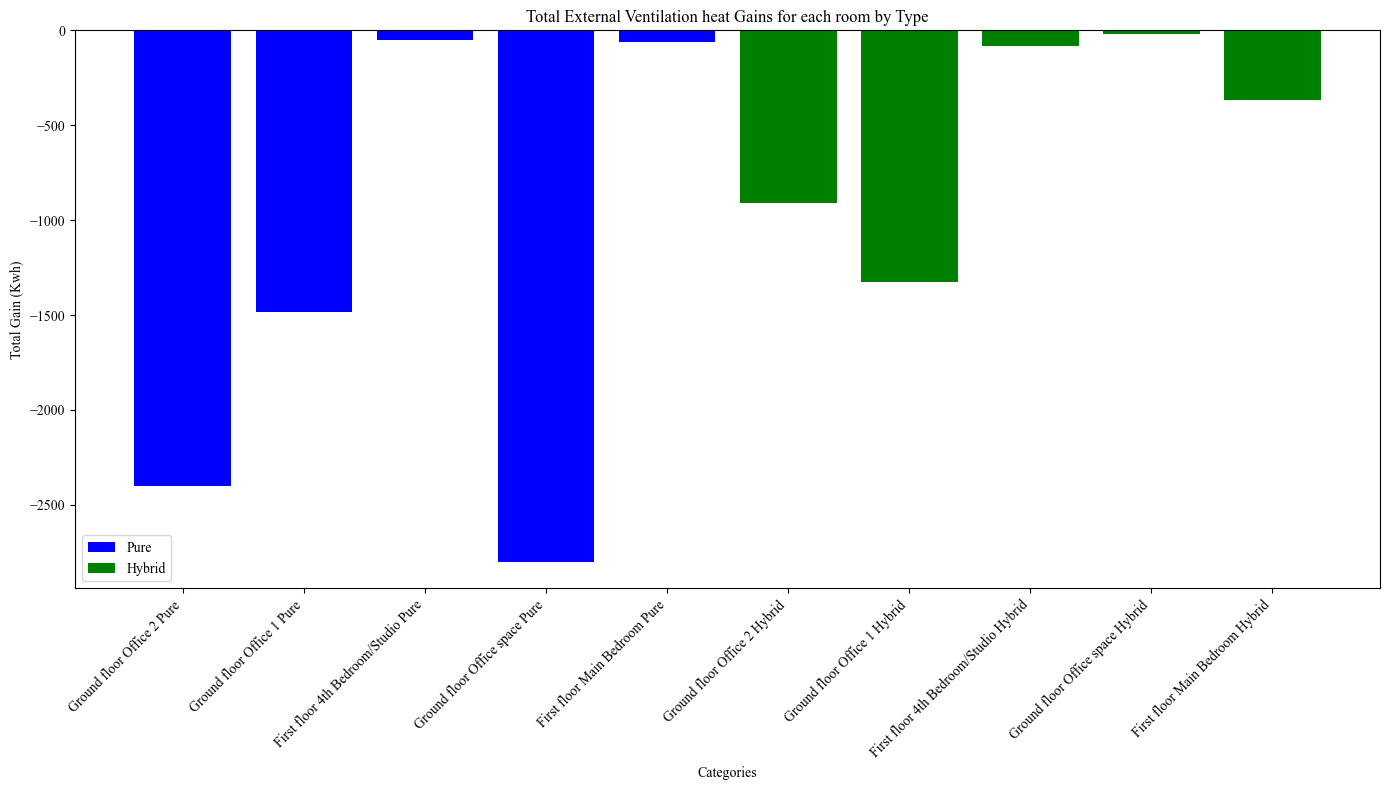

In [14]:
# 设置matplotlib字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 新文件路径
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\MacroFlo ext vent gain comparison.csv"

# 读取CSV文件
data = pd.read_csv(file_path)

# 移除Date和Time列（如果存在）
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# 确保数据为数值类型，非数值列将被转换为NaN
data = data.apply(pd.to_numeric, errors='coerce')

# 计算每列的总和
column_sums = data.sum()

# 分类列名
pure_columns = [col for col in column_sums.index if 'Pure' in col]
hybrid_columns = [col for col in column_sums.index if 'Hybrid' in col]

# 创建一个条形图
plt.figure(figsize=(14, 8))

# 绘制Pure列
plt.bar(pure_columns, column_sums[pure_columns], color='blue', label='Pure')
# 绘制Hybrid列
plt.bar(hybrid_columns, column_sums[hybrid_columns], color='green', label='Hybrid')

# 添加标题和标签
plt.title('Total External Ventilation heat Gains for each room by Type')
plt.xlabel('Categories')
plt.ylabel('Total Gain (Kwh)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

In [23]:
# 新文件路径
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\MacroFlo ext vent gain comparison.csv"

# 读取CSV文件
data = pd.read_csv(file_path)

# 移除Date和Time列（如果存在）
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# 确保数据为数值类型，非数值列将被转换为NaN
data = data.apply(pd.to_numeric, errors='coerce')

# 筛选并计算含有'Pure'的列的总和
pure_columns = [col for col in data.columns if 'Pure' in col]
pure_sum = data[pure_columns].sum().sum()

# 筛选并计算含有'Hybrid'的列的总和
hybrid_columns = [col for col in data.columns if 'Hybrid' in col]
hybrid_sum = data[hybrid_columns].sum().sum()

# 打印结果
print(f"Total sum of columns containing 'Pure': {pure_sum:.2f} Kwh")
print(f"Total sum of columns containing 'Hybrid': {hybrid_sum:.2f} Kwh")

Total sum of columns containing 'Pure': -6795.82 Kwh
Total sum of columns containing 'Hybrid': -2701.55 Kwh


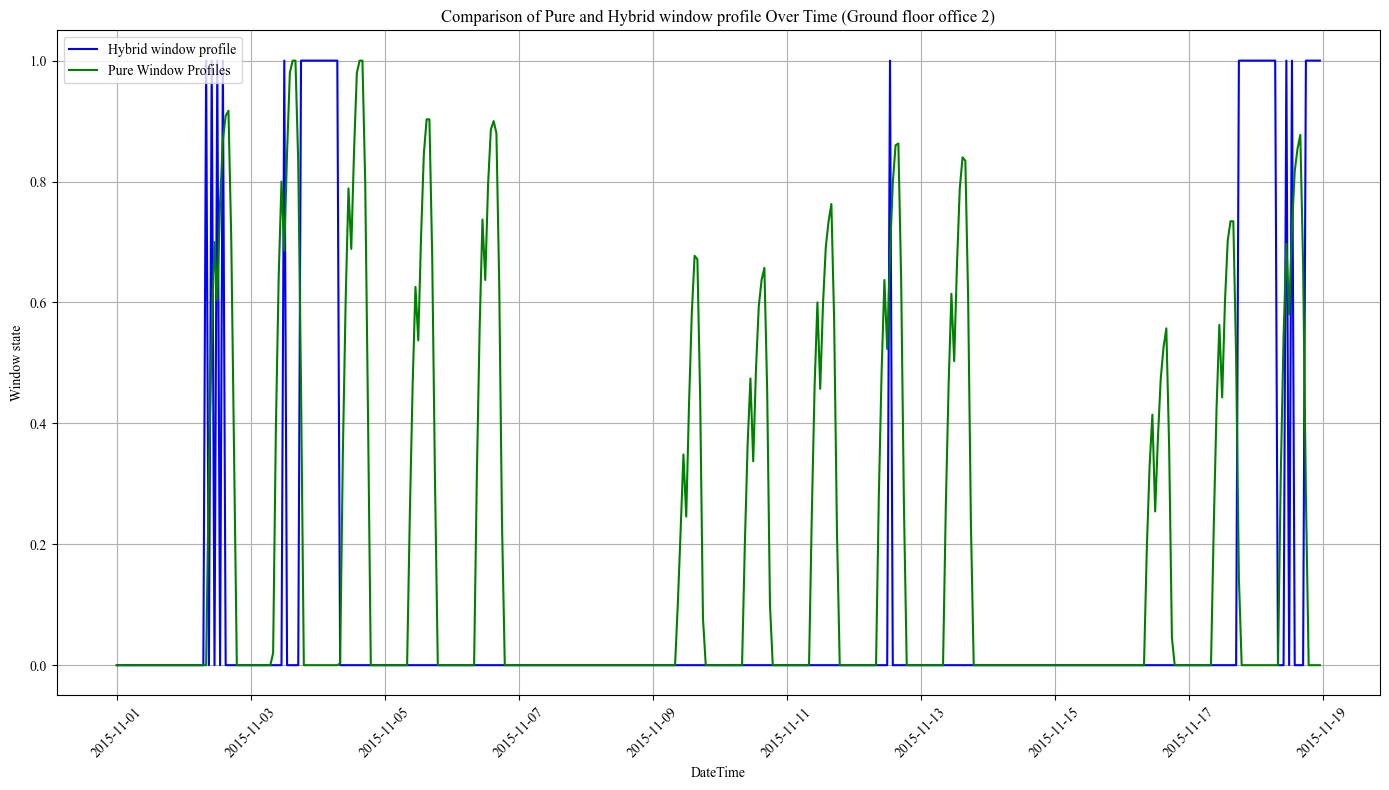

In [35]:
# 载入数据
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\windows profile comparisons.csv"
df = pd.read_csv(file_path)

# 定义ramp函数
def ramp(ta, ta_min, ramp_min, ta_max, ramp_max):
    if ta <= ta_min:
        return ramp_min
    elif ta >= ta_max:
        return ramp_max
    else:
        return (ta - ta_min) / (ta_max - ta_min) * (ramp_max - ramp_min) + ramp_min

# 应用ramp函数并根据条件创建新列
df['pure_window_profiles'] = df.apply(
    lambda row: ramp(row['groundflooroffice2'], 22.5, 0, 26, 1) if row['room-persons-counts'] != 0 else 0,
    axis=1
)

# 生成从11月1日到11月18日的日期列表
start_date = datetime(2015, 11, 1)
end_date = datetime(2015, 11, 18)
date_range = pd.date_range(start_date, end_date, freq='D')

# 创建日期和时间组合
datetime_list = [date + timedelta(hours=h) for date in date_range for h in range(24)]

# 确保日期时间列表的长度与DataFrame相同
if len(datetime_list) < len(df):
    additional_datetimes = [datetime_list[-1] + timedelta(hours=h) for h in range(len(df) - len(datetime_list))]
    datetime_list.extend(additional_datetimes)
elif len(datetime_list) > len(df):
    datetime_list = datetime_list[:len(df)]

# 添加DateTime列到DataFrame
df['DateTime'] = datetime_list

# 绘制折线图
plt.figure(figsize=(14, 8))
plt.plot(df['DateTime'], df['[window-state] of windows with [room-index = 2]'], label='Hybrid window profile', color='blue', linestyle='-')
plt.plot(df['DateTime'], df['pure_window_profiles'], label='Pure Window Profiles', color='green', linestyle='-')
plt.title('Comparison of Pure and Hybrid window profile Over Time (Ground floor office 2)')
plt.xlabel('DateTime')
plt.ylabel('Window state')
plt.xticks(rotation=45)
plt.legend()
plt.legend(loc='upper left')  # 设置图例在左上角
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# 载入数据
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\windows profile comparisons.csv"
df = pd.read_csv(file_path)

# 定义ramp函数
def ramp(ta, ta_min, ramp_min, ta_max, ramp_max):
    if ta <= ta_min:
        return ramp_min
    elif ta >= ta_max:
        return ramp_max
    else:
        return (ta - ta_min) / (ta_max - ta_min) * (ramp_max - ramp_min) + ramp_min

# 应用ramp函数并根据条件创建新列
df['pure_window_profiles'] = df.apply(
    lambda row: ramp(row['groundflooroffice2'], 22.5, 0, 26, 1) if row['room-persons-counts'] != 0 else 0,
    axis=1
)

# 计算'pure_window_profiles'和'[window-state] of windows with [room-index = 2]'列的总和
pure_window_profiles_total = df['pure_window_profiles'].sum()
window_state_total = df['[window-state] of windows with [room-index = 2]'].sum()

# 打印结果
print("Total for Pure Window Profiles:", pure_window_profiles_total)
print("Total for Window State with Room Index 2:", window_state_total)

Total for Pure Window Profiles: 74.89142857142858
Total for Window State with Room Index 2: 42.0


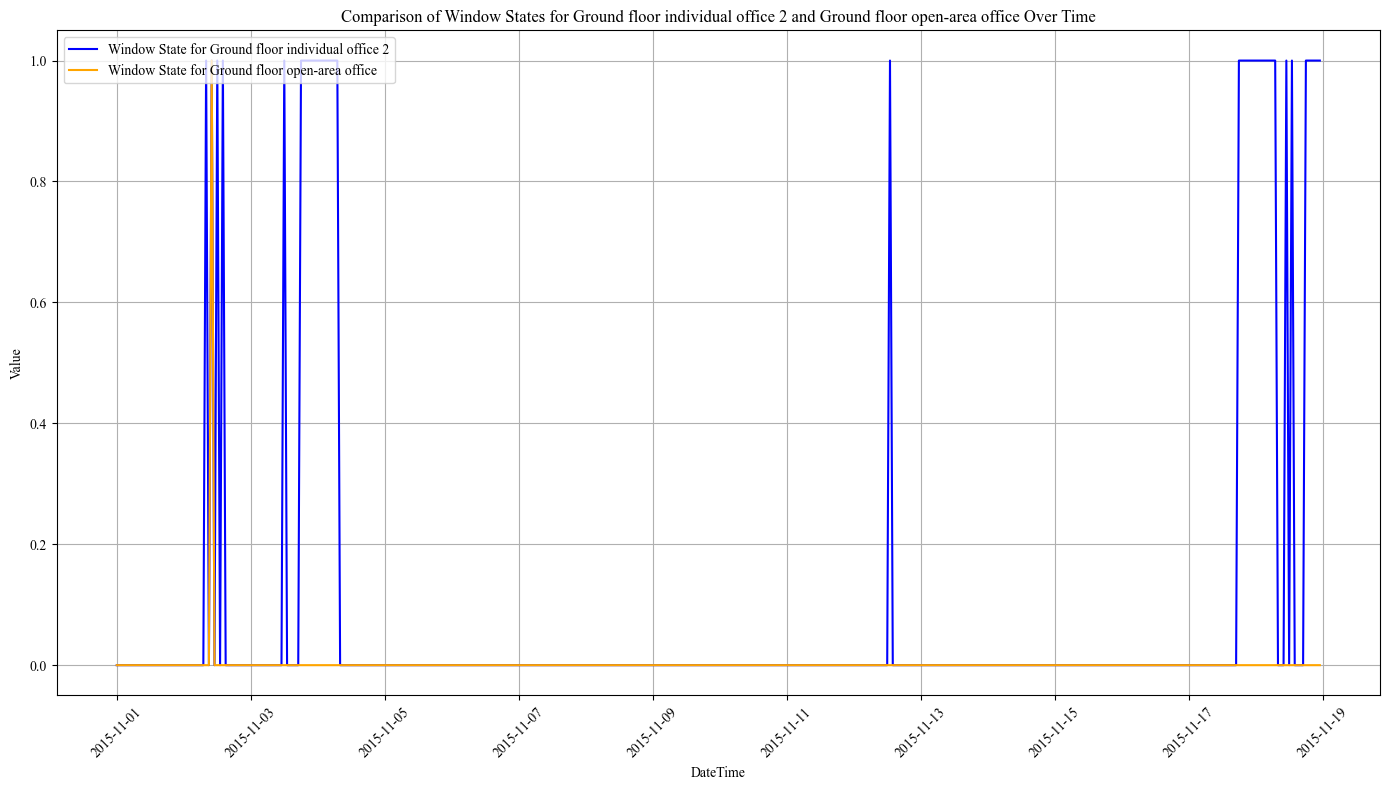

In [34]:
# 载入数据
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\windows profile comparisons.csv"
df = pd.read_csv(file_path)

# 生成从11月1日到11月18日的日期列表
start_date = datetime(2015, 11, 1)
end_date = datetime(2015, 11, 18)
date_range = pd.date_range(start_date, end_date, freq='D')

# 创建日期和时间组合
datetime_list = [date + timedelta(hours=h) for date in date_range for h in range(24)]

# 确保日期时间列表的长度与DataFrame相同
if len(datetime_list) < len(df):
    additional_datetimes = [datetime_list[-1] + timedelta(hours=h) for h in range(len(df) - len(datetime_list))]
    datetime_list.extend(additional_datetimes)
elif len(datetime_list) > len(df):
    datetime_list = datetime_list[:len(df)]

# 添加DateTime列到DataFrame
df['DateTime'] = datetime_list

# 绘制折线图
plt.figure(figsize=(14, 8))
plt.plot(df['DateTime'], df['[window-state] of windows with [room-index = 2]'], label='Window State for Ground floor individual office 2', color='blue', linestyle='-')
plt.plot(df['DateTime'], df['[window-state] of windows with [room-index = 5]'], label='Window State for Ground floor open-area office', color='orange', linestyle='-')
plt.title('Comparison of Window States for Ground floor individual office 2 and Ground floor open-area office Over Time')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

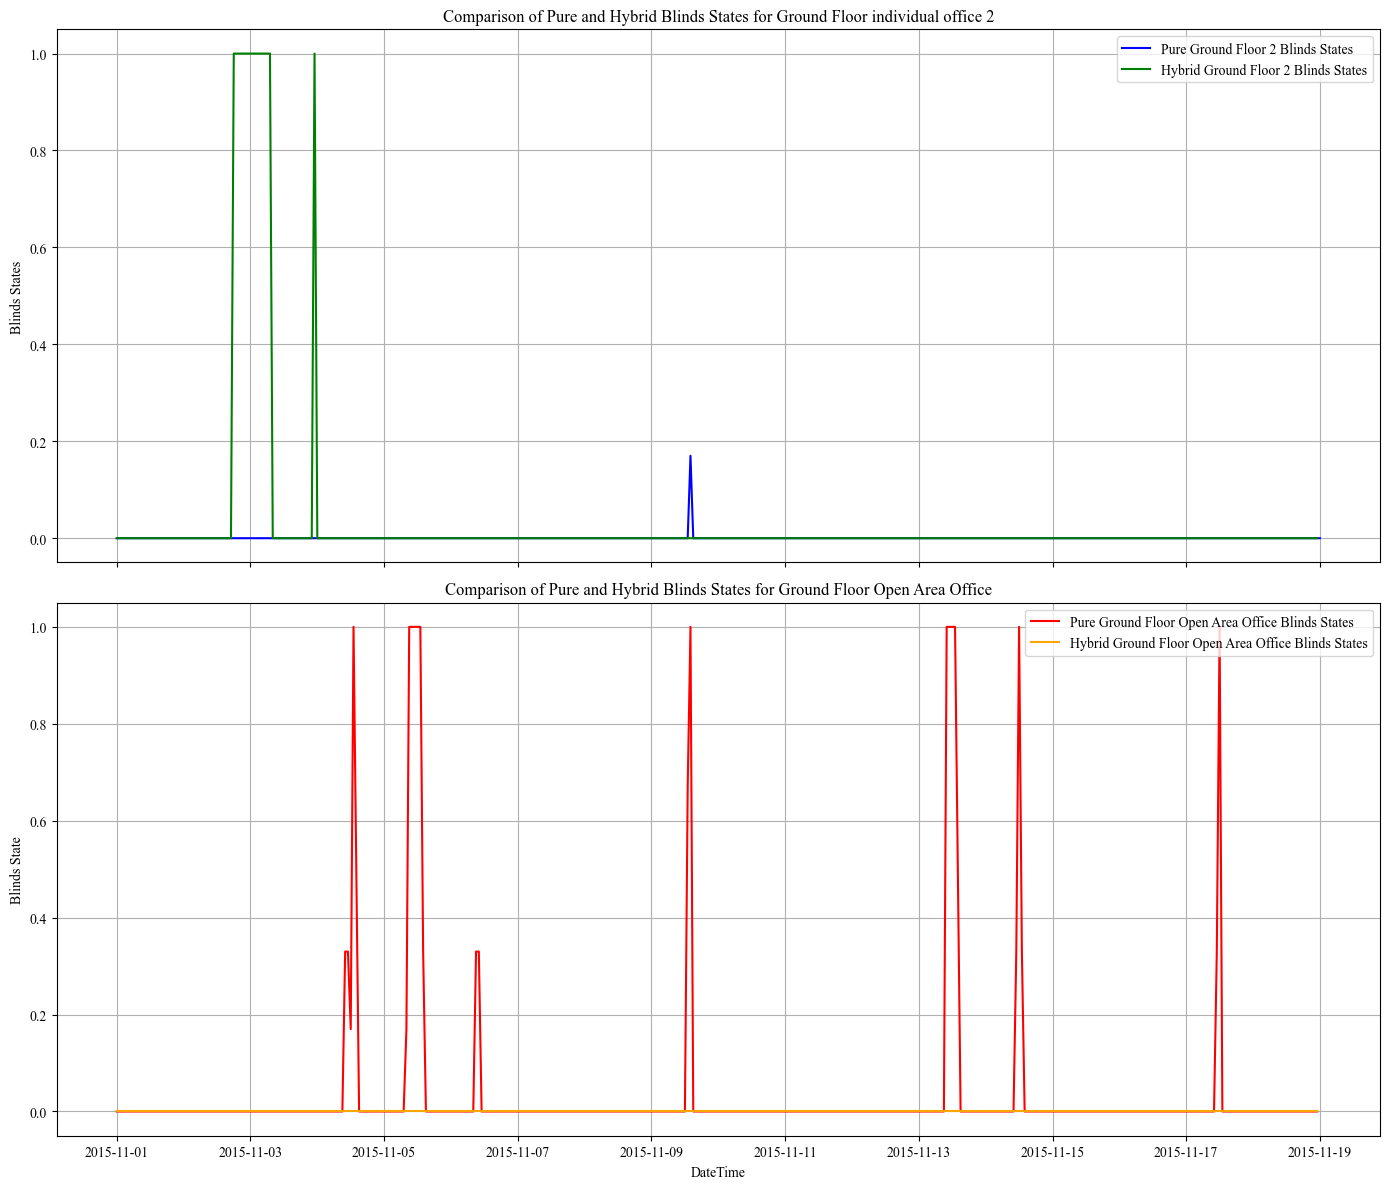

In [43]:
# 载入数据
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\blinds profile comparisons.csv"
df = pd.read_csv(file_path)

# 确保列名正确
df.columns = [col.strip() for col in df.columns]  # 去除列名中的可能存在的额外空格

# 生成从11月1日到11月18日的日期列表
start_date = datetime(2015, 11, 1)
end_date = datetime(2015, 11, 18)
date_range = pd.date_range(start_date, end_date, freq='D')

# 创建日期和时间组合
datetime_list = [date + timedelta(hours=h) for date in date_range for h in range(24)]

# 确保日期时间列表的长度与DataFrame相同
if len(datetime_list) < len(df):
    additional_datetimes = [datetime_list[-1] + timedelta(hours=h) for h in range(len(df) - len(datetime_list))]
    datetime_list.extend(additional_datetimes)
elif len(datetime_list) > len(df):
    datetime_list = datetime_list[:len(df)]

# 添加DateTime列到DataFrame
df['DateTime'] = datetime_list

# 创建一个图和两个subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # 分享横坐标轴

# 第一个subplot
ax1.plot(df['DateTime'], df['original ground floor 2Internal shade state'], label='Pure Ground Floor 2 Blinds States', color='blue')
ax1.plot(df['DateTime'], df['adjust ground floor 2 Internal shade state'], label='Hybrid Ground Floor 2 Blinds States', color='green')
ax1.set_title('Comparison of Pure and Hybrid Blinds States for Ground Floor individual office 2')
ax1.set_ylabel('Blinds States')
ax1.legend()
ax1.grid(True)

# 第二个subplot
ax2.plot(df['DateTime'], df['original ground floor openarea office Internal shade state'], label='Pure Ground Floor Open Area Office Blinds States', color='red')
ax2.plot(df['DateTime'], df['adjust ground floor openarea office Internal shade state'], label='Hybrid Ground Floor Open Area Office Blinds States', color='orange')
ax2.set_title('Comparison of Pure and Hybrid Blinds States for Ground Floor Open Area Office')
ax2.set_xlabel('DateTime')
ax2.set_ylabel('Blinds State')
ax2.legend(loc='upper right')  # 将图例放在右上角
ax2.grid(True)

# 自动调整subplot参数，以给定标题和标签足够空间
plt.tight_layout()
plt.show()

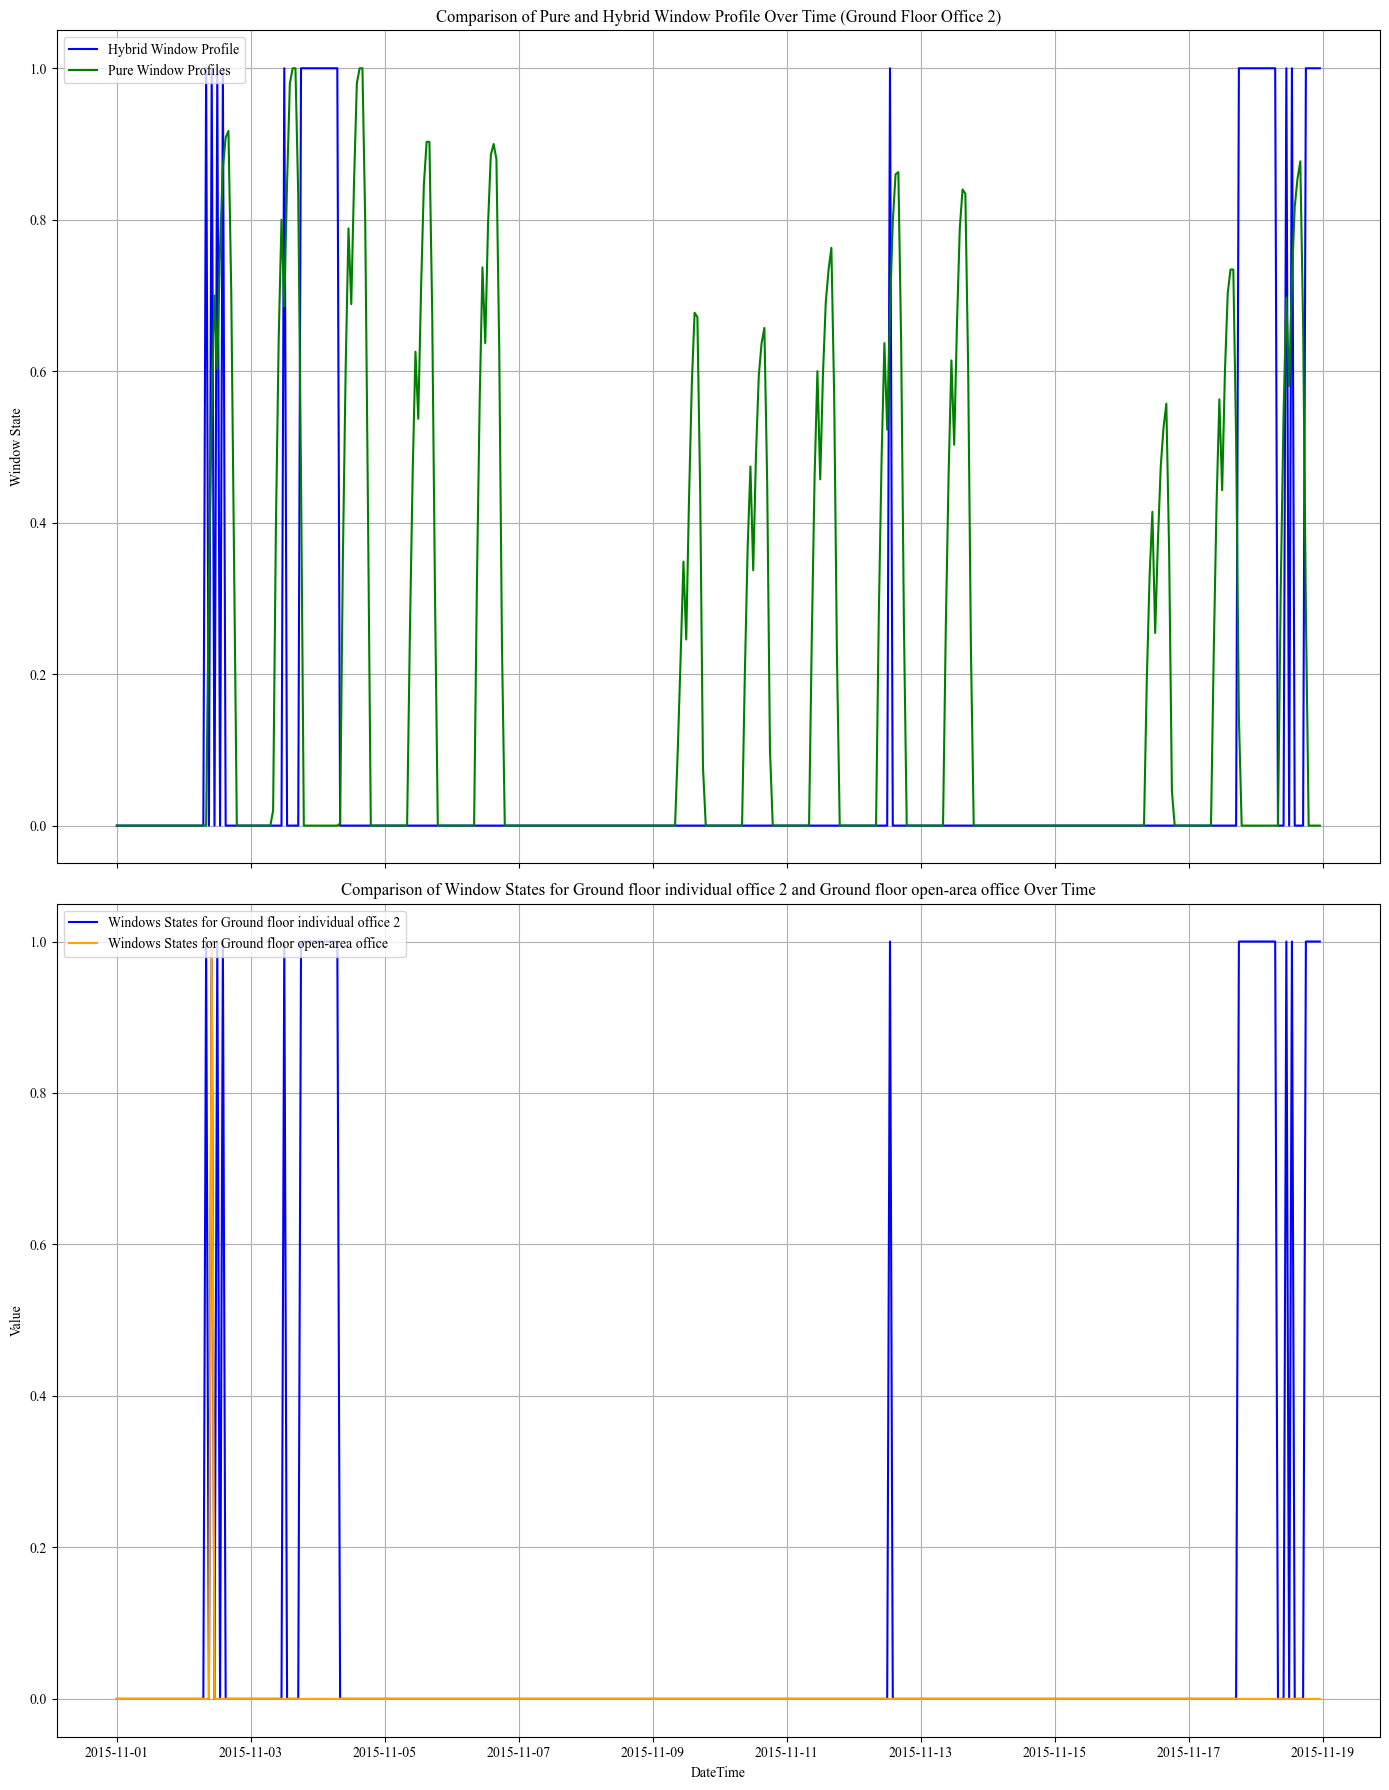

In [48]:
# 载入数据
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\windows profile comparisons.csv"
df = pd.read_csv(file_path)

# 定义ramp函数
def ramp(ta, ta_min, ramp_min, ta_max, ramp_max):
    if ta <= ta_min:
        return ramp_min
    elif ta >= ta_max:
        return ramp_max
    else:
        return (ta - ta_min) / (ta_max - ta_min) * (ramp_max - ramp_min) + ramp_min

# 应用ramp函数并根据条件创建新列
df['pure_window_profiles'] = df.apply(
    lambda row: ramp(row['groundflooroffice2'], 22.5, 0, 26, 1) if row['room-persons-counts'] != 0 else 0,
    axis=1
)

# 生成从11月1日到11月18日的日期列表
start_date = datetime(2015, 11, 1)
end_date = datetime(2015, 11, 18)
date_range = pd.date_range(start_date, end_date, freq='D')

# 创建日期和时间组合
datetime_list = [date + timedelta(hours=h) for date in date_range for h in range(24)]

# 确保日期时间列表的长度与DataFrame相同
if len(datetime_list) < len(df):
    additional_datetimes = [datetime_list[-1] + timedelta(hours=h) for h in range(len(df) - len(datetime_list))]
    datetime_list.extend(additional_datetimes)
elif len(datetime_list) > len(df):
    datetime_list = datetime_list[:len(df)]

# 添加DateTime列到DataFrame
df['DateTime'] = datetime_list

# 创建一个图和两个subplot，共享X轴
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 18), sharex=True)

# 第一个subplot绘制第一个时间序列折线图
ax1.plot(df['DateTime'], df['[window-state] of windows with [room-index = 2]'], label='Hybrid Window Profile', color='blue', linestyle='-')
ax1.plot(df['DateTime'], df['pure_window_profiles'], label='Pure Window Profiles', color='green', linestyle='-')
ax1.set_title('Comparison of Pure and Hybrid Window Profile Over Time (Ground Floor Office 2)')
ax1.set_ylabel('Window State')
ax1.legend(loc='upper left')
ax1.grid(True)

# 第二个subplot绘制第二个时间序列折线图
ax2.plot(df['DateTime'], df['[window-state] of windows with [room-index = 2]'], label='Windows States for Ground floor individual office 2', color='blue', linestyle='-')
ax2.plot(df['DateTime'], df['[window-state] of windows with [room-index = 5]'], label='Windows States for Ground floor open-area office', color='orange', linestyle='-')
ax2.set_title('Comparison of Window States for Ground floor individual office 2 and Ground floor open-area office Over Time')
ax2.set_xlabel('DateTime')
ax2.set_ylabel('Value')
ax2.legend(loc='upper left')
ax2.grid(True)

plt.tight_layout()
plt.show()

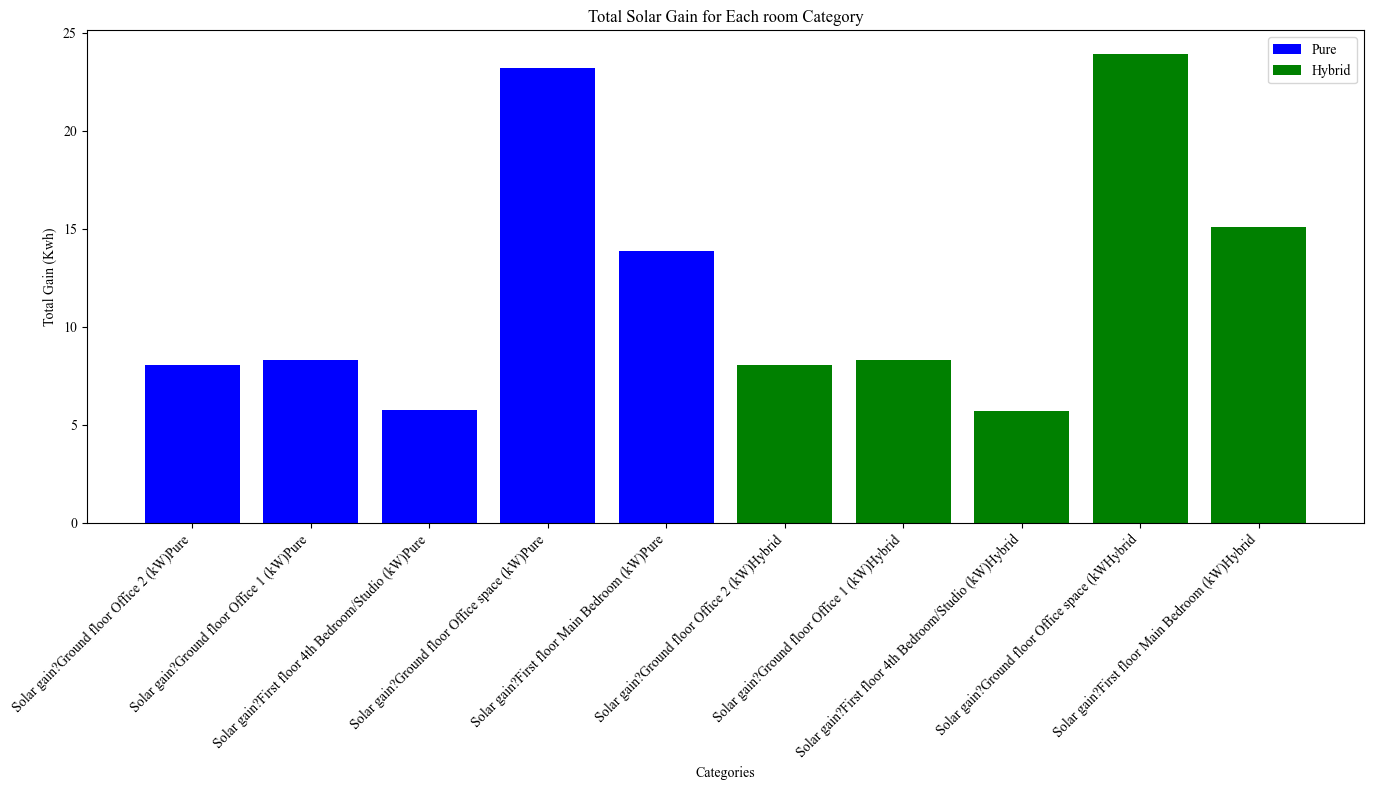

In [53]:
# 设置matplotlib字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 文件路径
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\Solar gain comparison.csv"

# 读取CSV文件
data = pd.read_csv(file_path)

# 移除Date和Time列（如果存在）
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# 确保数据为数值类型，非数值列将被转换为NaN
data = data.apply(pd.to_numeric, errors='coerce')

# 计算每列的总和
column_sums = data.sum()

# 分类列名（如果您的数据集中具有特定含义的列名，如Pure或Hybrid，请提供具体的列名进行分类）
pure_columns = [col for col in column_sums.index if 'Pure' in col]
hybrid_columns = [col for col in column_sums.index if 'Hybrid' in col]

# 创建一个条形图
plt.figure(figsize=(14, 8))

# 绘制Pure列
plt.bar(pure_columns, column_sums[pure_columns], color='blue', label='Pure')
# 绘制Hybrid列
plt.bar(hybrid_columns, column_sums[hybrid_columns], color='green', label='Hybrid')

# 添加标题和标签
plt.title('Total Solar Gain for Each room Category')
plt.xlabel('Categories')
plt.ylabel('Total Gain (Kwh)')
plt.xticks(rotation=45, ha='right')
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()

In [52]:
# 文件路径
file_path = r"C:\Users\86180\OneDrive - University College London\Dissertation\Drawing for Mark Group House\Solar gain comparison.csv"

# 读取CSV文件
data = pd.read_csv(file_path)

# 移除Date和Time列（如果存在）
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# 确保数据为数值类型，非数值列将被转换为NaN
data = data.apply(pd.to_numeric, errors='coerce')

# 计算每列的总和
column_sums = data.sum()

# 分类列名
pure_columns = [col for col in column_sums.index if 'Pure' in col]
hybrid_columns = [col for col in column_sums.index if 'Hybrid' in col]

# 计算Pure和Hybrid列的总和
pure_total = column_sums[pure_columns].sum()
hybrid_total = column_sums[hybrid_columns].sum()

# 打印结果
print("Total for Pure:", pure_total)
print("Total for Hybrid:", hybrid_total)

Total for Pure: 59.132600000000004
Total for Hybrid: 61.1243


Index(['Date', 'Time', 'Predicted mean vote?Ground floor Office 2Pure',
       'Predicted mean vote?Ground floor Office 1Pure',
       'Predicted mean vote?First floor 4th Bedroom/StudioPure',
       'Predicted mean vote?Ground floor Office spacePure',
       'Predicted mean vote?First floor Main BedroomPure',
       'Predicted mean vote?Ground floor Office 2Hybrid',
       'Predicted mean vote?Ground floor Office 1Hybrid',
       'Predicted mean vote?First floor 4th Bedroom/StudioHybrid',
       'Predicted mean vote?Ground floor Office spaceHybrid',
       'Predicted mean vote?First floor Main BedroomHybrid', 'Persons count',
       'DateTime'],
      dtype='object')


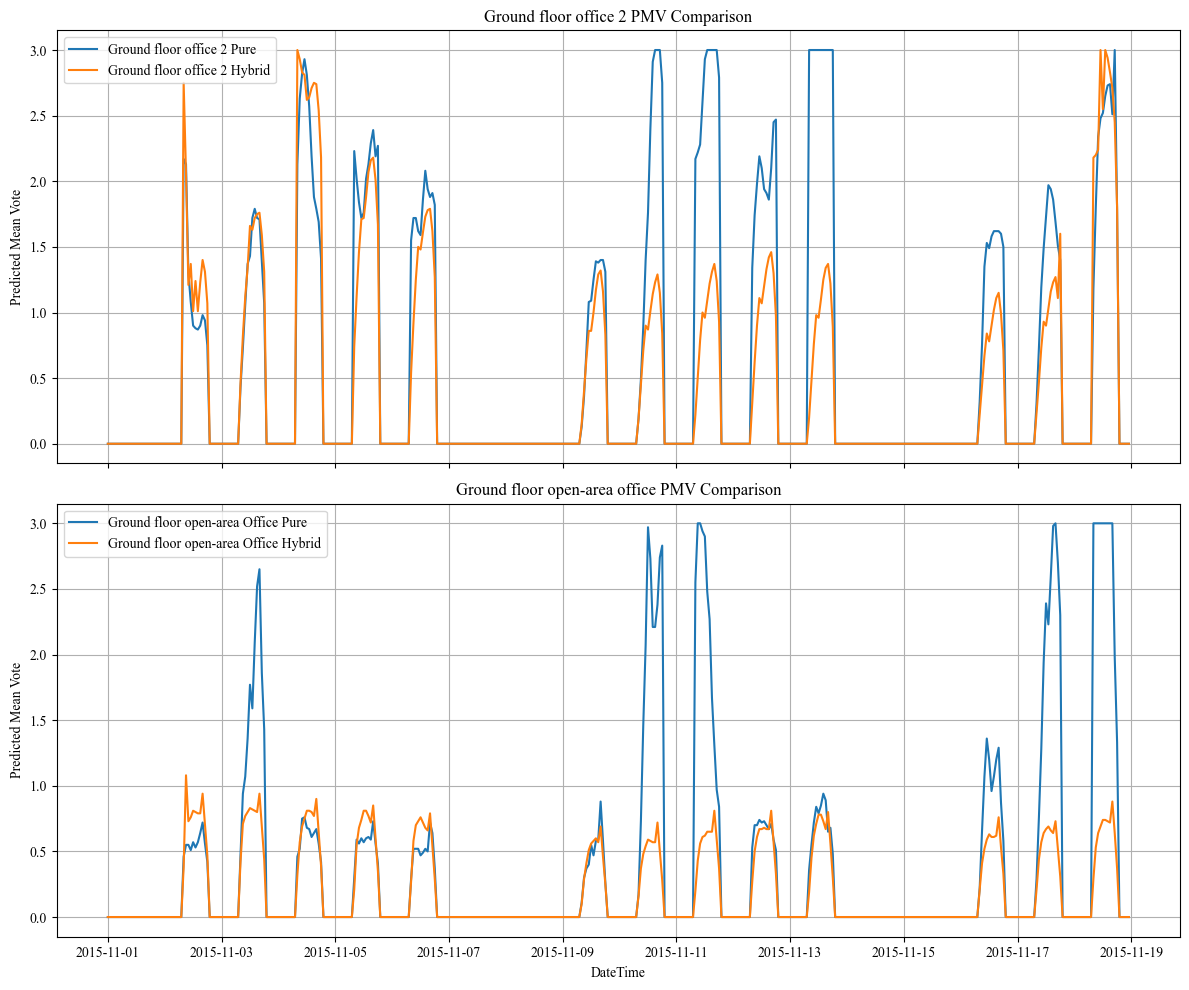

In [69]:
# 加载数据
file_path = "C:/Users/86180/OneDrive - University College London/Dissertation/Drawing for Mark Group House/predicted mean vote.csv"
df = pd.read_csv(file_path)

# 生成从11月1日到11月18日的日期列表
start_date = datetime(2015, 11, 1)
end_date = datetime(2015, 11, 18)
date_range = pd.date_range(start_date, end_date, freq='D')

# 创建日期和时间组合
datetime_list = [date + timedelta(hours=h) for date in date_range for h in range(24)]

# 确保日期时间列表的长度与DataFrame相同
if len(datetime_list) > len(df):
    datetime_list = datetime_list[:len(df)]

# 添加DateTime列到DataFrame
df['DateTime'] = datetime_list

# 当'Persons count'为0时，替换相关列的值为0
replace_columns = [
    'Predicted mean vote?Ground floor Office 2Pure',
    'Predicted mean vote?Ground floor Office 2Hybrid',
    'Predicted mean vote?Ground floor Office spacePure',
    'Predicted mean vote?Ground floor Office spaceHybrid'
]
df.loc[df['Persons count'] == 0, replace_columns] = 0

# 检查列名，确保准确无误
print(df.columns)

# 设置图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column, share x-axis

# Ground floor Office 2
ax1.plot(df['DateTime'], df['Predicted mean vote?Ground floor Office 2Pure'], label='Ground floor office 2 Pure')
ax1.plot(df['DateTime'], df['Predicted mean vote?Ground floor Office 2Hybrid'], label='Ground floor office 2 Hybrid')
ax1.set_title('Ground floor office 2 PMV Comparison')
ax1.set_ylabel('Predicted Mean Vote')
ax1.legend()
ax1.grid(True)

# Ground floor Office space
ax2.plot(df['DateTime'], df['Predicted mean vote?Ground floor Office spacePure'], label='Ground floor open-area Office Pure')
ax2.plot(df['DateTime'], df['Predicted mean vote?Ground floor Office spaceHybrid'], label='Ground floor open-area Office Hybrid')
ax2.set_title('Ground floor open-area office PMV Comparison')
ax2.set_xlabel('DateTime')
ax2.set_ylabel('Predicted Mean Vote')
ax2.legend()
ax2.grid(True)

# 调整布局
plt.tight_layout()
plt.show()

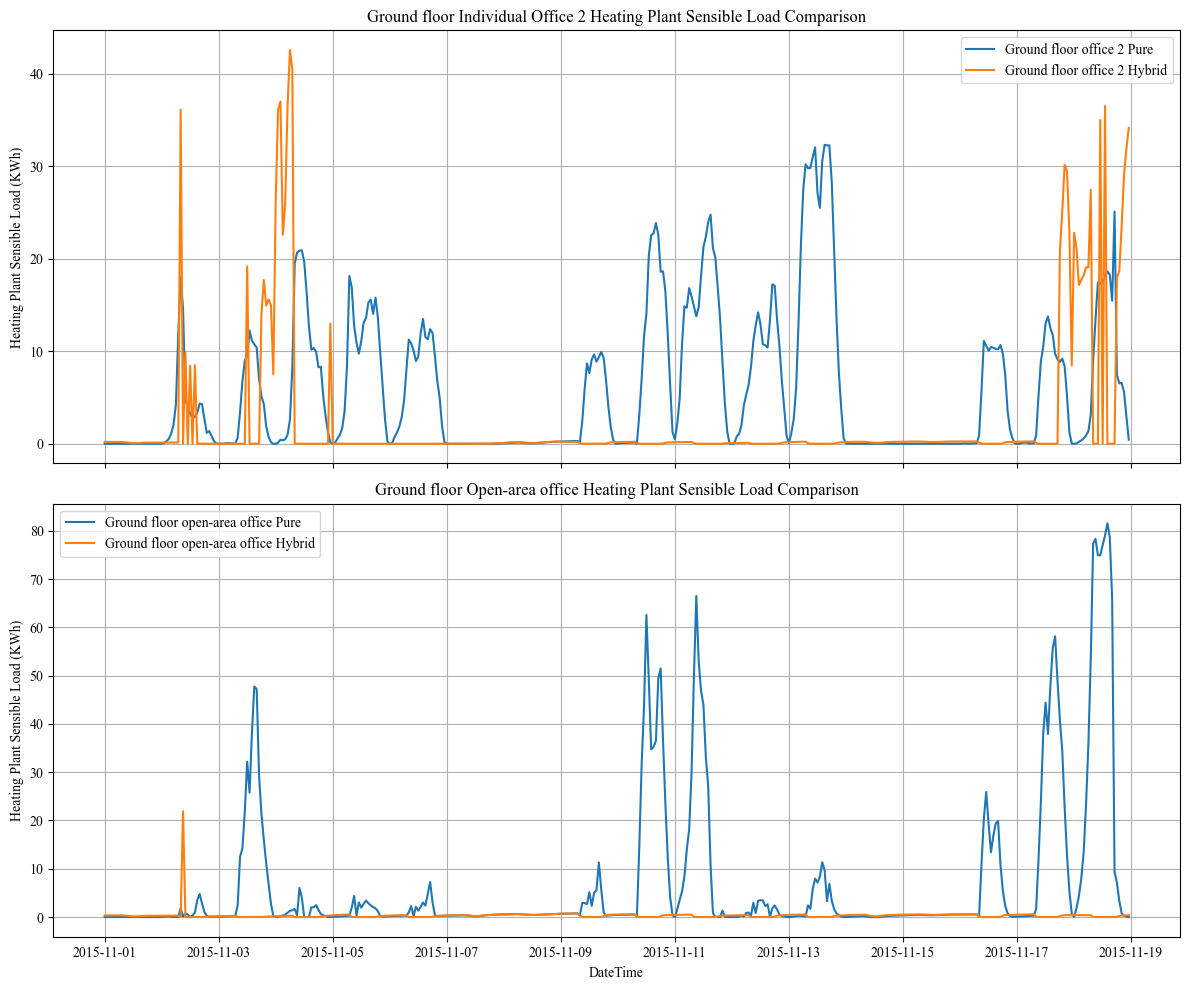

In [76]:
# 加载数据
file_path = "C:/Users/86180/OneDrive - University College London/Dissertation/Drawing for Mark Group House/heating plant sensible load comparison.csv"
df = pd.read_csv(file_path)

# 生成从11月1日到11月18日的日期列表
start_date = datetime(2015, 11, 1)
end_date = datetime(2015, 11, 18)
date_range = pd.date_range(start_date, end_date, freq='D')

# 创建日期和时间组合
datetime_list = [date + timedelta(hours=h) for date in date_range for h in range(24)]

# 确保日期时间列表的长度与DataFrame相同
if len(datetime_list) > len(df):
    datetime_list = datetime_list[:len(df)]

# 添加DateTime列到DataFrame
df['DateTime'] = datetime_list

# 设置图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)  # 2 rows, 1 column, share x-axis

# Heating plant sensible load?Ground floor Office 2 Pure vs Hybrid
ax1.plot(df['DateTime'], df['Heating plant sensible load?Ground floor Office 2 (kW)Pure'], label='Ground floor office 2 Pure')
ax1.plot(df['DateTime'], df['Heating plant sensible load?Ground floor Office 2 (kW)Hybrid'], label='Ground floor office 2 Hybrid')
ax1.set_title('Ground floor Individual Office 2 Heating Plant Sensible Load Comparison')
ax1.set_ylabel('Heating Plant Sensible Load (KWh)')
ax1.legend()
ax1.grid(True)

# Heating plant sensible load?Ground floor Office 2 Hybrid vs Ground floor Office space Hybrid
ax2.plot(df['DateTime'], df['Heating plant sensible load?Ground floor Office space (kW)Pure'], label='Ground floor open-area office Pure')
ax2.plot(df['DateTime'], df['Heating plant sensible load?Ground floor Office space (kW)Hybrid'], label='Ground floor open-area office Hybrid')
ax2.set_title('Ground floor Open-area office Heating Plant Sensible Load Comparison')
ax2.set_xlabel('DateTime')
ax2.set_ylabel('Heating Plant Sensible Load (KWh)')
ax2.legend()
ax2.grid(True)

# 调整布局
plt.tight_layout()
plt.show()